# Estimation of tree height using GEDI dataset
## GEDI features

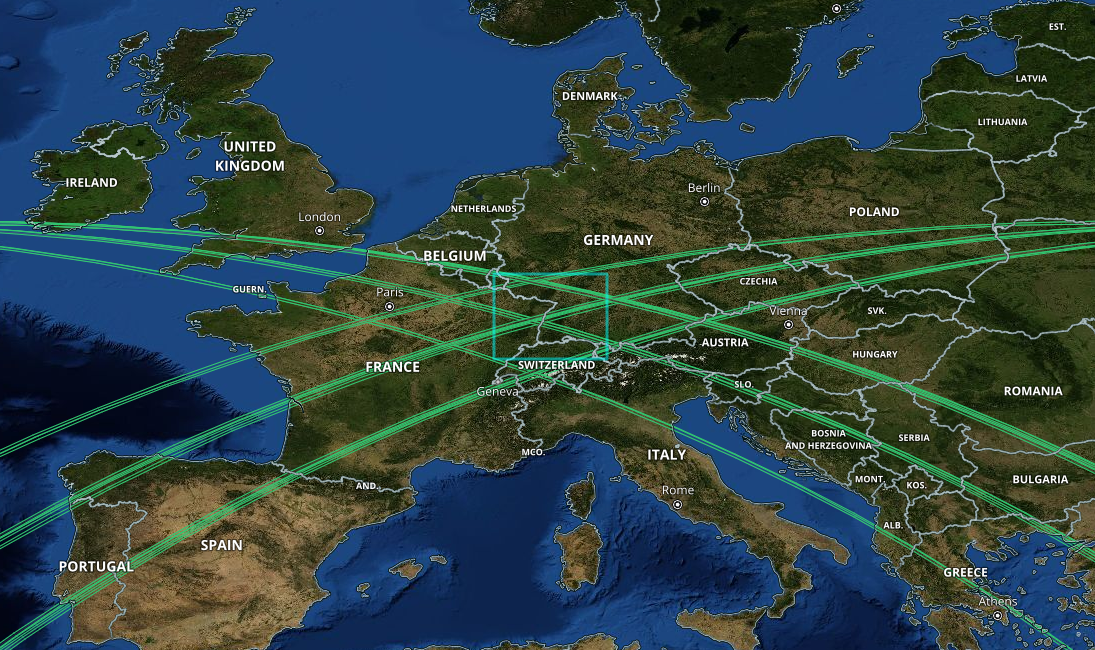

In [17]:
from IPython.display import Image
import rasterio
from rasterio import *
from rasterio.plot import show
from rasterio.plot import show_hist
from matplotlib import pyplot

Image("../images/tree_height_path_map.png" , width = 600, height = 300)

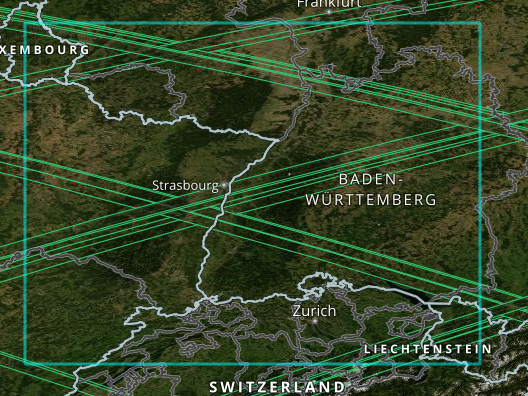

In [4]:
Image("../images/tree_height_study_area.png")

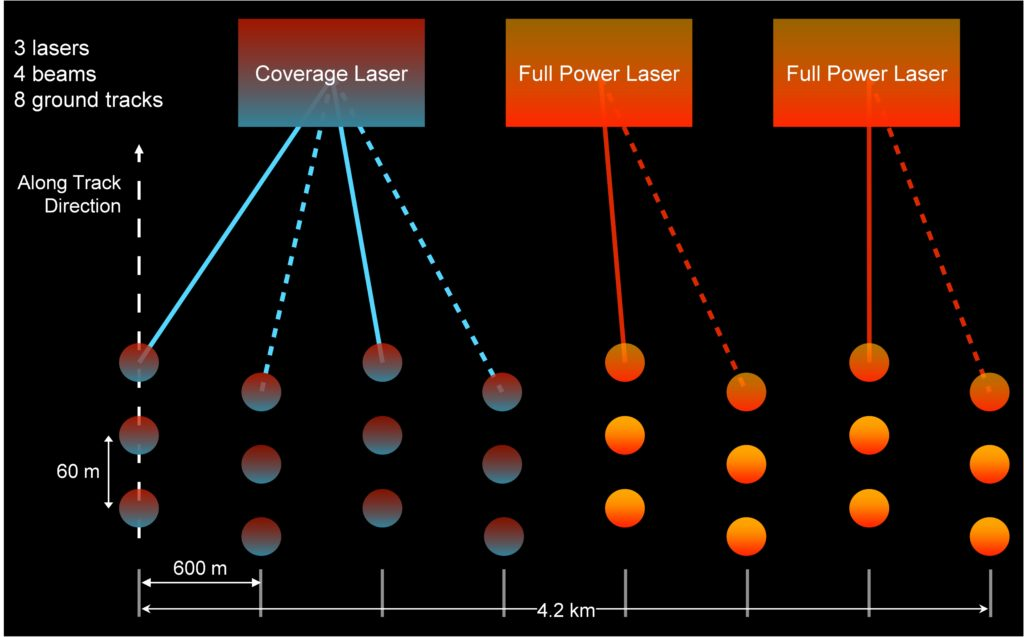

In [5]:
Image("../images/tree_hehght_beam.jpg" , width = 600, height = 300)

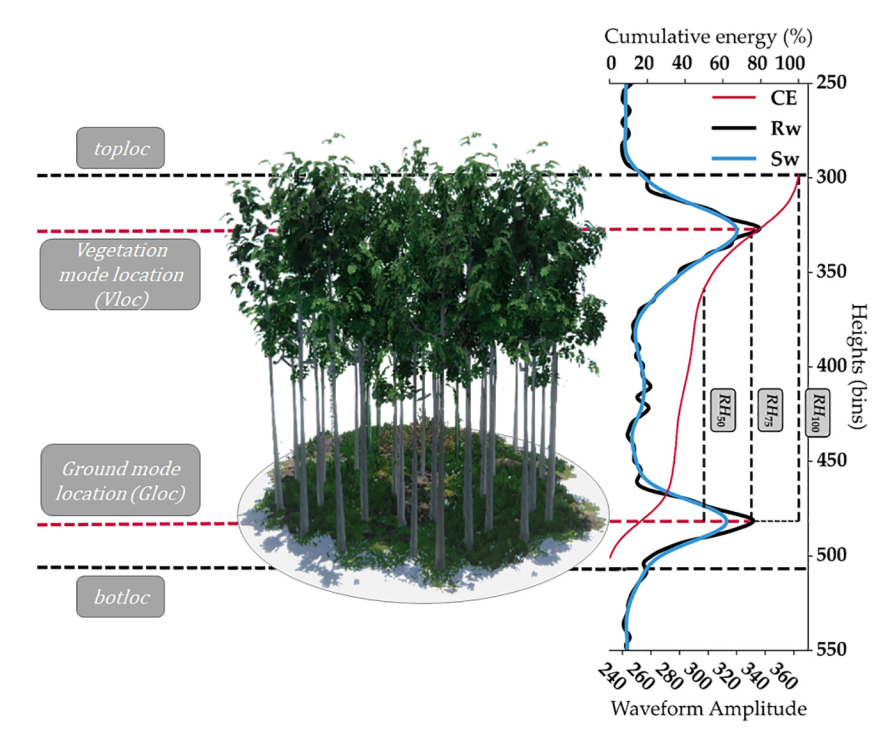

In [6]:
Image("../images/tree_height_pulse_distribution.png", width = 700, height = 300)

## Data presentation

**Available txt files.**

In [7]:
! ls tree_height/txt/*

tree_height/txt/eu_x_y_height_select.txt
tree_height/txt/eu_x_y_predictors_select.txt
tree_height/txt/eu_x_y_select.txt
tree_height/txt/eu_y_x_select_6algorithms_fullTable.txt


In [8]:
! wc -l tree_height/txt/*

  1267240 tree_height/txt/eu_x_y_height_select.txt
  1267240 tree_height/txt/eu_x_y_predictors_select.txt
  1267239 tree_height/txt/eu_x_y_select.txt
  1267240 tree_height/txt/eu_y_x_select_6algorithms_fullTable.txt
  5068959 total


**File storing point location (longitude and latitude). Such file can be used with "gdallocationinfo" to extract enviromental predictor at each point.** 

In [9]:
! head tree_height/txt/eu_x_y_select.txt

6.050001 49.727499
6.0500017 49.922155
6.0500021 48.602377
6.0500089 48.151979
6.0500102 49.58841
6.0500143 48.608456
6.0500165 48.571401
6.0500189 49.921613
6.0500201 48.822645
6.0500238 49.847522


**File storing point location and tree height. The height is obtained as average of the 6 algorithms.**

In [10]:
! head tree_height/txt/eu_x_y_height_select.txt  

ID X Y h
1 6.050001 49.727499 3139
2 6.0500017 49.922155 1454.75
3 6.0500021 48.602377 853.5
4 6.0500089 48.151979 3141
5 6.0500102 49.58841 2065.25
6 6.0500143 48.608456 1246.5
7 6.0500165 48.571401 2938.75
8 6.0500189 49.921613 3294.75
9 6.0500201 48.822645 1623.5


**File storing tree hight (cm) obtained by 6 algorithms, with their associate quality flag.**
 * a?_95:  tree hight (cm) at 95 quintile, for each algorithm
 * min_rh_95: minimum value of tree hight (cm) ammong the 6 algorithms 
 * max_rh_95: maximum value of tree hight (cm) ammong the 6 algorithms
 * BEAM: 1-4 coverage beam = lower power (worst) ; 5-8 power beam = higher power (better) 
 * digital_elev: digital mdoel elevation
 * elev_low: elevation of center of lowest mode
 * qc_a?: quality_flag for six algorithms quality_flag = 1 (better)
 * se_a?: sensitivity for six algorithms sensitivity < 0.95 (worse)  ;  sensitivity > 0.95  (beter ) 
 * solar_ele: solar elevation. > 0 day ; < 0 night 

In [11]:
! head tree_height/txt/eu_y_x_select_6algorithms_fullTable.txt

ID X Y a1_95 a2_95 a3_95 a4_95 a5_95 a6_95 min_rh_95 max_rh_95 BEAM digital_elev elev_low qc_a1 qc_a2 qc_a3 qc_a4 qc_a5 qc_a6 se_a1 se_a2 se_a3 se_a4 se_a5 se_a6 deg_fg solar_ele
1 6.050001 49.727499 3139 3139 3139 3120 3139 3139 3120 3139 5 4.1e+02 383.72153 1 1 1 1 1 1 0.962 0.984 0.968 0.962 0.989 0.979 0 17.7
2 6.0500017 49.922155 1022 2303 970 872 5596 1524 872 5596 5 2.9e+02 2374.1411 0 0 0 0 0 0 0.948 0.990 0.960 0.948 0.994 0.980 0 43.7
3 6.0500021 48.602377 380 1336 332 362 1336 1340 332 1340 4 4.4e+02 435.97781 1 1 1 1 1 1 0.947 0.975 0.956 0.947 0.981 0.968 0 0.2
4 6.0500089 48.151979 3153 3142 3142 3127 3138 3142 3127 3153 2 4.5e+02 422.00537 1 1 1 1 1 1 0.930 0.970 0.943 0.930 0.978 0.962 0 -14.2
5 6.0500102 49.58841 666 4221 651 33 5611 2723 33 5611 8 3.7e+02 2413.7483 0 0 0 0 0 0 0.941 0.983 0.946 0.941 0.992 0.969 0 22.1
6 6.0500143 48.608456 787 1179 1187 761 1833 1833 761 1833 3 4.2e+02 415.51581 1 1 1 1 1 1 0.952 0.979 0.961 0.952 0.986 0.975 0 0.2
7 6.0500165 48.571

**File storing enviromental predictors at each point location.**

In [12]:
! head tree_height/txt/eu_x_y_predictors_select.txt

ID X Y BLDFIE_WeigAver CECSOL_WeigAver CHELSA_bio18 CHELSA_bio4 convergence cti dev-magnitude eastness elev forestheight glad_ard_SVVI_max glad_ard_SVVI_med glad_ard_SVVI_min northness ORCDRC_WeigAver outlet_dist_dw_basin SBIO3_Isothermality_5_15cm SBIO4_Temperature_Seasonality_5_15cm treecover
1 6.050001 49.727499 1540 13 2113 5893 -10.4865598678589 -238043120 1.15841722488403 0.0690935924649239 353.983123779297 23 276.87109375 46.444091796875 347.665405273438 0.0424997806549072 9 780403 19.7989921569824 440.672210693359 85 
2 6.0500017 49.922155 1491 12 1993 5912 33.2743606567383 -208915344 -1.75534081459045 0.269112348556519 267.511688232422 19 -49.5263671875 19.552734375 -130.541748046875 0.182779803872108 16 772777 20.8894119262695 457.756195068359 85 
3 6.0500021 48.602377 1521 17 2124 5983 0.0452934727072716 -137479792 1.90877985954285 -0.0160545445978642 389.751159667969 21 93.25732421875 50.74365234375 384.5224609375 0.0362534299492836 14 898820 20.6958770751953 481.8796997070

**Available geo raster files.**

In [13]:
! ls tree_height/geodata_raster

BLDFIE_WeigAver.tif    glad_ard_SVVI_med.tif
CECSOL_WeigAver.tif    glad_ard_SVVI_min.tif
CHELSA_bio18.tif       latitude.tif
CHELSA_bio4.tif        longitude.tif
convergence.tif        northness.tif
cti.tif		       ORCDRC_WeigAver.tif
dev-magnitude.tif      outlet_dist_dw_basin.tif
eastness.tif	       SBIO3_Isothermality_5_15cm.tif
elev.tif	       SBIO4_Temperature_Seasonality_5_15cm.tif
forestheight.tif       treecover.tif
glad_ard_SVVI_max.tif


### Geo raster files description.

**Spectral Variability Vegetation Index obtained from the [GLAD ARD](https://glad.umd.edu/ard/glad-landsat-ard-tools) dataset.** 

* glad_ard_SVVI_min.tif: Spectral Variability Vegetation Index colculated using a 3 years temporal minimum composite. 
* glad_ard_SVVI_med.tif: Spectral Variability Vegetation Index colculated using a 3 years temporal median composite.
* glad_ard_SVVI_max.tif: Spectral Variability Vegetation Index colculated using a 3 years temporal maximum composite.

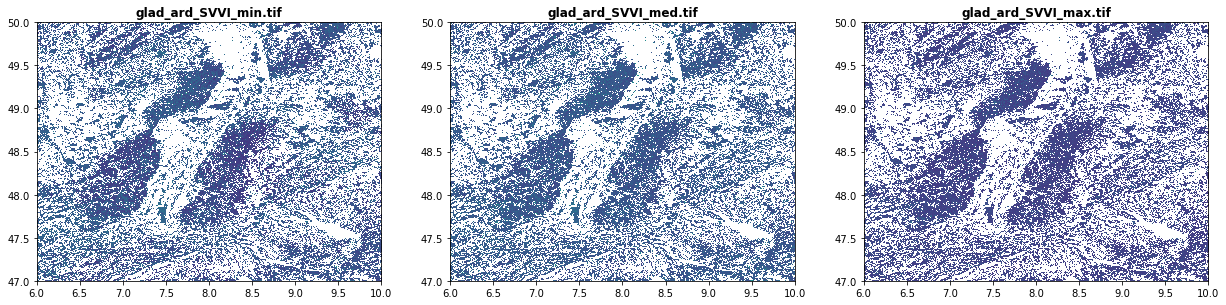

In [18]:
src1 = rasterio.open("tree_height/geodata_raster/glad_ard_SVVI_min.tif")
src2 = rasterio.open("tree_height/geodata_raster/glad_ard_SVVI_med.tif")
src3 = rasterio.open("tree_height/geodata_raster/glad_ard_SVVI_max.tif")
fig, (src1p,src2p,src3p) = pyplot.subplots(1,3, figsize=(21,7))
show(src1, ax=src1p, title='glad_ard_SVVI_min.tif')
show(src2, ax=src2p, title='glad_ard_SVVI_med.tif')
show(src3, ax=src3p, title='glad_ard_SVVI_max.tif')

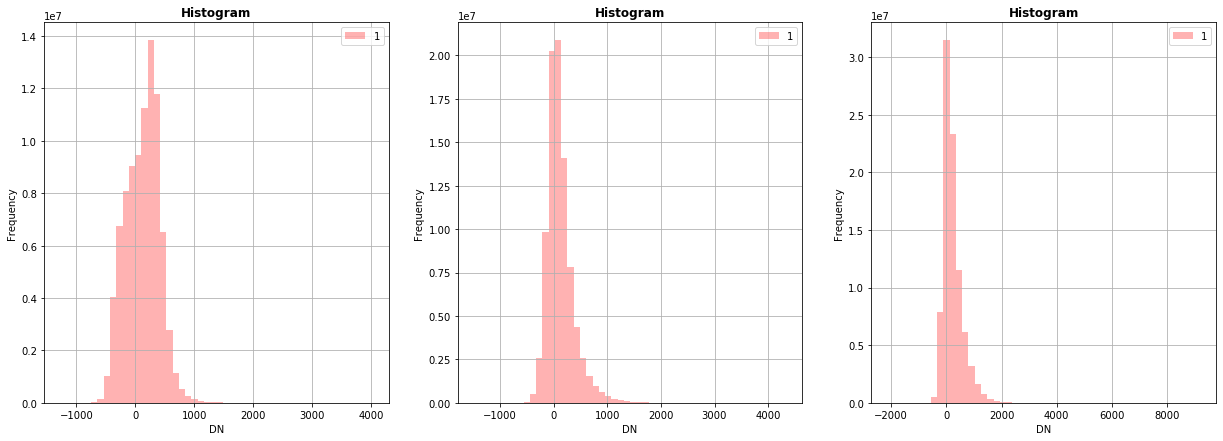

In [48]:
fig, (src1p,src2p,src3p) = pyplot.subplots(1,3, figsize=(21,7))
show_hist( src1, ax=src1p, bins=50, lw=0.0, stacked=False, alpha=0.3, histtype='stepfilled', title="glad_ard_SVVI_min.tif")
show_hist( src2, ax=src2p, bins=50, lw=0.0, stacked=False, alpha=0.3, histtype='stepfilled', title="glad_ard_SVVI_med.tif")
show_hist( src3, ax=src3p, bins=50, lw=0.0, stacked=False, alpha=0.3, histtype='stepfilled', title="glad_ard_SVVI_max.tif")

**Climate data obained from the [CHELSA](https://chelsa-climate.org/bioclim/) dataset. 

* CHELSA_bio18.tif: mean monthly precipitation amount of the warmest quarter
* CHELSA_bio4.tif: temperature seasonality (standard deviation of the monthly mean temperatures)

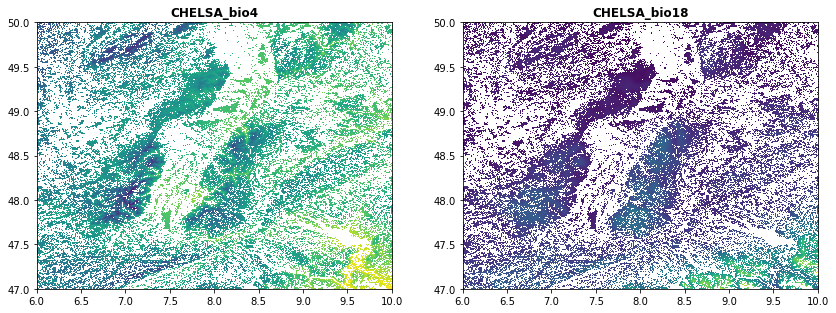

In [44]:
import rasterio
from rasterio.plot import show
src1 = rasterio.open("tree_height/geodata_raster/CHELSA_bio4.tif")
src2 = rasterio.open("tree_height/geodata_raster/CHELSA_bio18.tif")
fig, (src1p,src2p) = pyplot.subplots(1,2, figsize=(14,7))
show((src1), ax=src1p, title='CHELSA_bio4')
show((src2), ax=src2p, title='CHELSA_bio18')

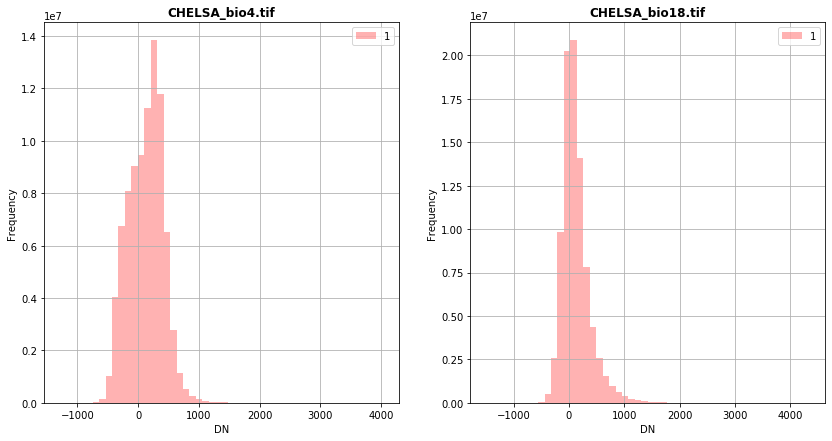

In [49]:
fig, (src1p,src2p) = pyplot.subplots(1,2, figsize=(14,7))
show_hist( src1, ax=src1p, bins=50, lw=0.0, stacked=False, alpha=0.3, histtype='stepfilled', title="CHELSA_bio4.tif")
show_hist( src2, ax=src2p, bins=50, lw=0.0, stacked=False, alpha=0.3, histtype='stepfilled', title="CHELSA_bio18.tif")

**Soil data obained from the [SOILGRID](https://soilgrids.org/)

* BLDFIE_WeigAver.tif: Bulk density (fine earth) in kg / cubic-meter (weigheted average as function for the depth)
* CECSOL_WeigAver.tif: Cation exchange capacity of soil in cmolc/kg (weigheted average as function for the depth)
* ORCDRC_WeigAver.tif: Soil organic carbon content (fine earth fraction) in g per kg (weigheted average as function for the depth)

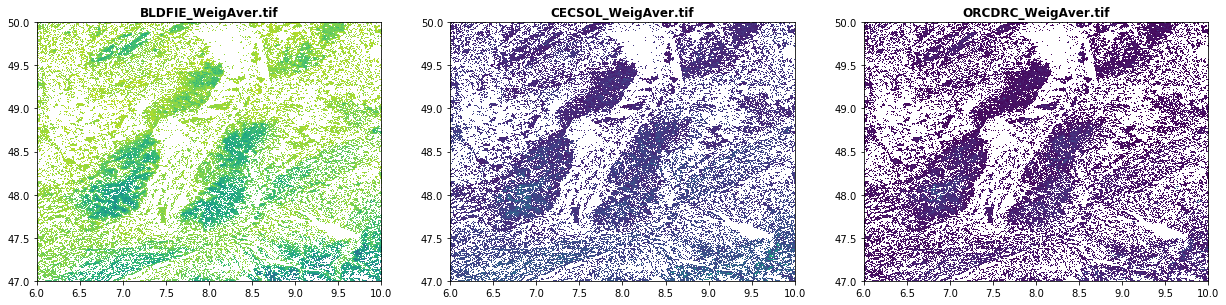

In [50]:
src1 = rasterio.open("tree_height/geodata_raster/BLDFIE_WeigAver.tif")
src2 = rasterio.open("tree_height/geodata_raster/CECSOL_WeigAver.tif")
src3 = rasterio.open("tree_height/geodata_raster/ORCDRC_WeigAver.tif")
fig, (src1p,src2p,src3p) = pyplot.subplots(1,3, figsize=(21,7))
show(src1, ax=src1p, title='BLDFIE_WeigAver.tif')
show(src2, ax=src2p, title='CECSOL_WeigAver.tif')
show(src3, ax=src3p, title='ORCDRC_WeigAver.tif')

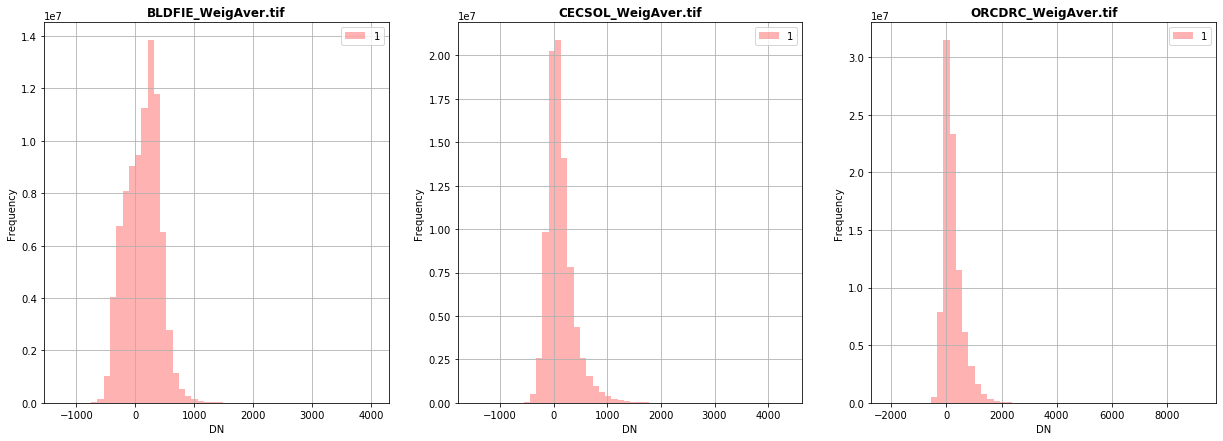

In [5]:
fig, (src1p,src2p,src3p) = pyplot.subplots(1,3, figsize=(21,7))
show_hist( src1, ax=src1p, bins=50, lw=0.0, stacked=False, alpha=0.3, histtype='stepfilled', title="BLDFIE_WeigAver.tif")
show_hist( src2, ax=src2p, bins=50, lw=0.0, stacked=False, alpha=0.3, histtype='stepfilled', title="CECSOL_WeigAver.tif")
show_hist( src3, ax=src3p, bins=50, lw=0.0, stacked=False, alpha=0.3, histtype='stepfilled', title="ORCDRC_WeigAver.tif")

**Geomorphological data obtained from [geomorpho90m](http://spatial-ecology.net/docs/build/html/GEODATA/geomorpho90m/geomorpho90m.html)**

* elev.tif: elevation
* convergence.tif: convergence 
* northness.tif: northness
* eastness.tif: eastness
* dev-magnitude.tif: Maximum multiscaledeviation

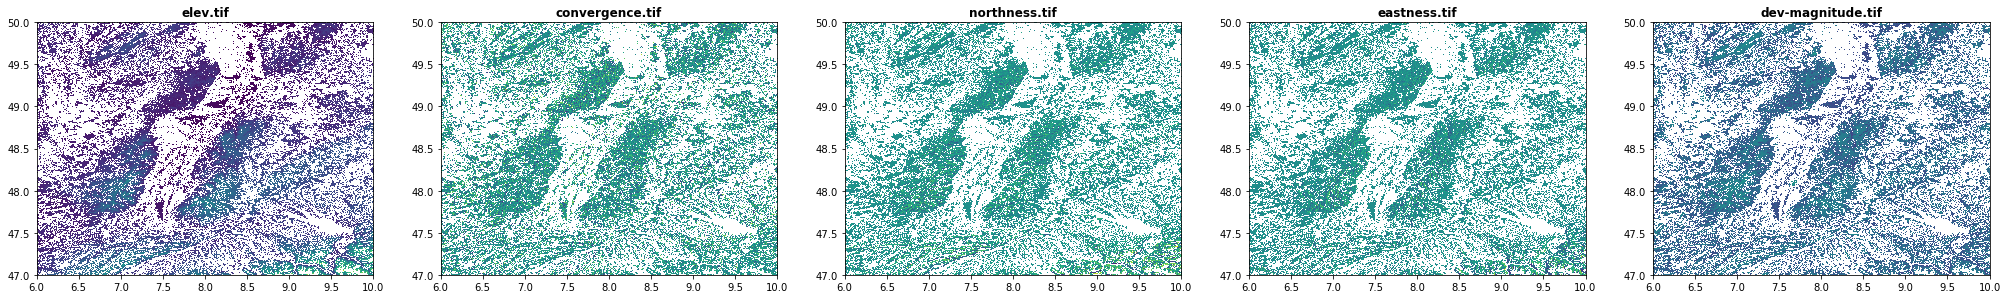

In [7]:
src1 = rasterio.open("tree_height/geodata_raster/elev.tif")
src2 = rasterio.open("tree_height/geodata_raster/convergence.tif")
src3 = rasterio.open("tree_height/geodata_raster/northness.tif")
src4 = rasterio.open("tree_height/geodata_raster/eastness.tif")
src5 = rasterio.open("tree_height/geodata_raster/dev-magnitude.tif")
fig, (src1p,src2p,src3p,src4p,src5p) = pyplot.subplots(1,5, figsize=(35,7))
show(src1, ax=src1p, title='elev.tif')
show(src2, ax=src2p, title='convergence.tif')
show(src3, ax=src3p, title='northness.tif')
show(src4, ax=src4p, title='eastness.tif')
show(src5, ax=src5p, title='dev-magnitude.tif')

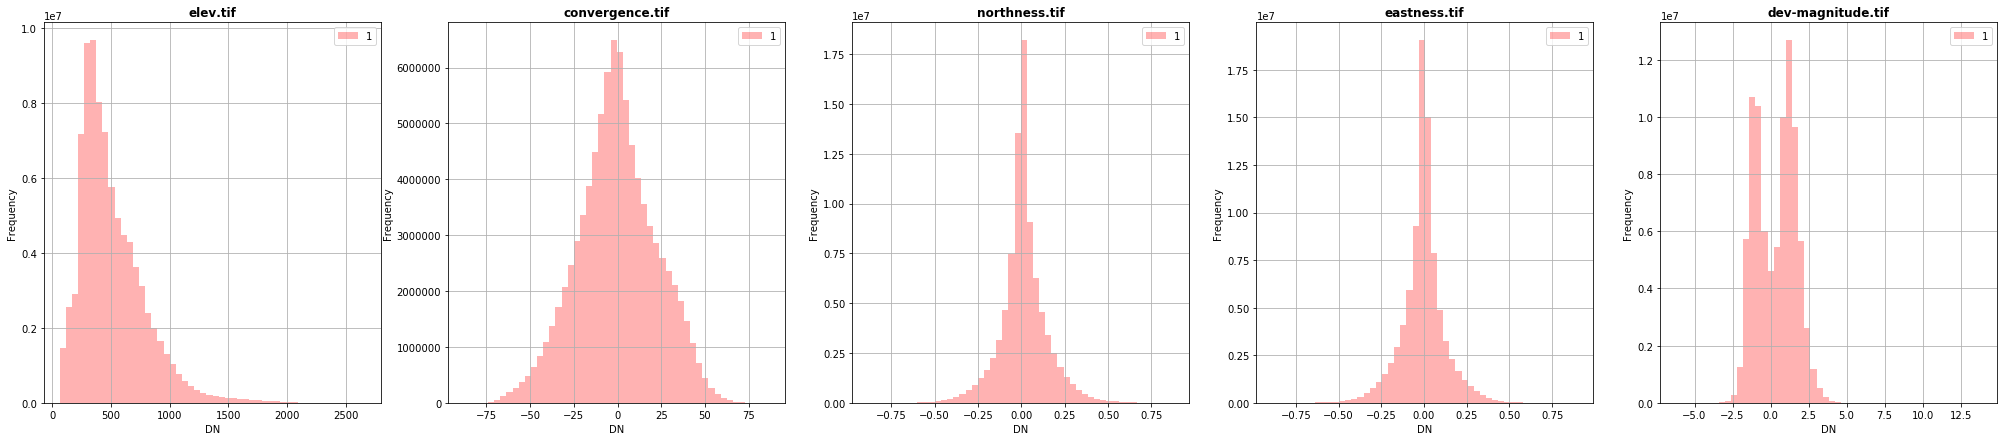

In [9]:
fig, (src1p,src2p,src3p,src4p,src5p) = pyplot.subplots(1,5, figsize=(35,7))
show_hist( src1, ax=src1p, bins=50, lw=0.0, stacked=False, alpha=0.3, histtype='stepfilled', title="elev.tif")
show_hist( src2, ax=src2p, bins=50, lw=0.0, stacked=False, alpha=0.3, histtype='stepfilled', title="convergence.tif")
show_hist( src3, ax=src3p, bins=50, lw=0.0, stacked=False, alpha=0.3, histtype='stepfilled', title="northness.tif")
show_hist( src4, ax=src4p, bins=50, lw=0.0, stacked=False, alpha=0.3, histtype='stepfilled', title="eastness.tif")
show_hist( src5, ax=src5p, bins=50, lw=0.0, stacked=False, alpha=0.3, histtype='stepfilled', title="dev-magnitude.tif")

**Geomorphological data obtained from [hydromorpho90m](https://essd.copernicus.org/preprints/essd-2022-9/)**

* cti.tif:Compound topographic index
* outlet_dist_dw_basin.tif: Distance between focal grid cell and the outlet grid cell in the network 

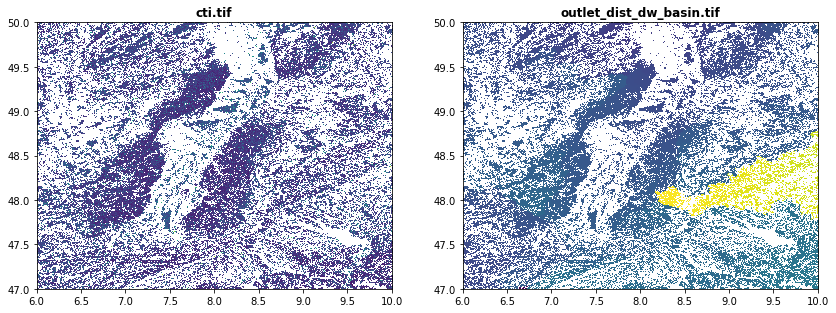

In [10]:
src1 = rasterio.open("tree_height/geodata_raster/cti.tif")
src2 = rasterio.open("tree_height/geodata_raster/outlet_dist_dw_basin.tif")
fig, (src1p,src2p) = pyplot.subplots(1,2, figsize=(14,7))
show((src1), ax=src1p, title='cti.tif')
show((src2), ax=src2p, title='outlet_dist_dw_basin.tif')

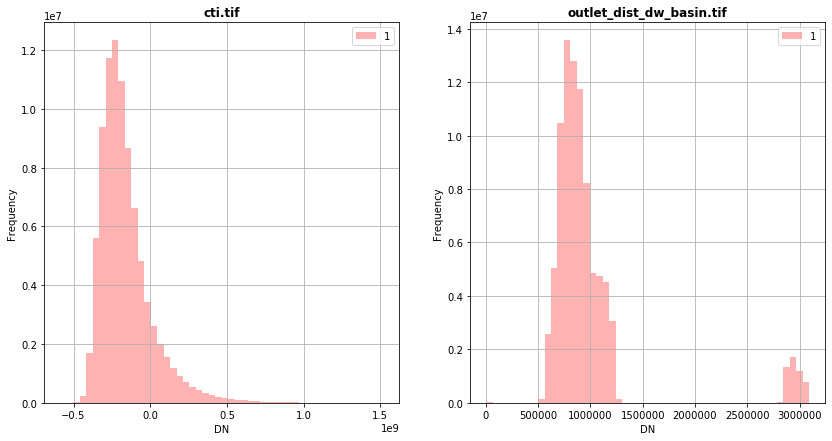

In [11]:
fig, (src1p,src2p) = pyplot.subplots(1,2, figsize=(14,7))
show_hist( src1, ax=src1p, bins=50, lw=0.0, stacked=False, alpha=0.3, histtype='stepfilled', title="cti.tif")
show_hist( src2, ax=src2p, bins=50, lw=0.0, stacked=False, alpha=0.3, histtype='stepfilled', title="outlet_dist_dw_basin.tif")

**Soil data obtained from [Global Soil Bioclimatic variables](https://zenodo.org/record/4558732#.YmqPg3VfiV4)**

* SBIO3_Isothermality_5_15cm.tif
* SBIO4_Temperature_Seasonality_5_15cm.tif

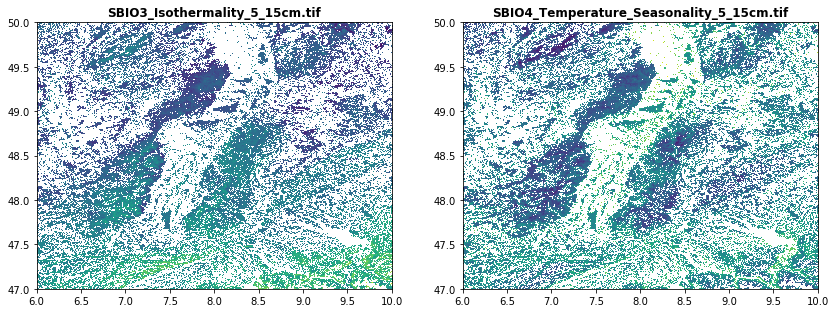

In [12]:
src1 = rasterio.open("tree_height/geodata_raster/SBIO3_Isothermality_5_15cm.tif")
src2 = rasterio.open("tree_height/geodata_raster/SBIO4_Temperature_Seasonality_5_15cm.tif")
fig, (src1p,src2p) = pyplot.subplots(1,2, figsize=(14,7))
show((src1), ax=src1p, title='SBIO3_Isothermality_5_15cm.tif')
show((src2), ax=src2p, title='SBIO4_Temperature_Seasonality_5_15cm.tif')

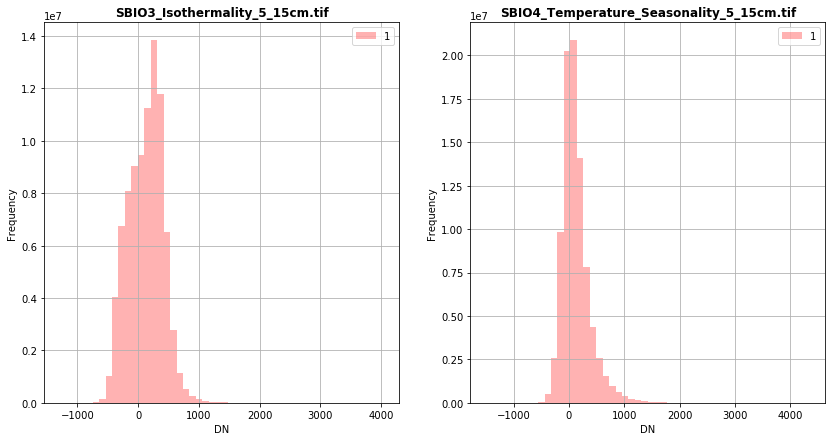

In [19]:
fig, (src1p,src2p) = pyplot.subplots(1,2, figsize=(14,7))
show_hist( src1, ax=src1p, bins=50, lw=0.0, stacked=False, alpha=0.3, histtype='stepfilled', title="SBIO3_Isothermality_5_15cm.tif")
show_hist( src2, ax=src2p, bins=50, lw=0.0, stacked=False, alpha=0.3, histtype='stepfilled', title="SBIO4_Temperature_Seasonality_5_15cm.tif")

**Forest cover in percentage obtained from [Global Forest Change](https://earthenginepartners.appspot.com/science-2013-global-forest/download_v1.7.html)**

* treecover.tif: canopy cover in percentage

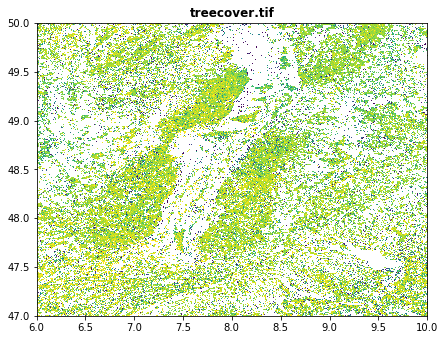

In [21]:
src1 = rasterio.open("tree_height/geodata_raster/treecover.tif")
fig, (src1p) = pyplot.subplots(1,1, figsize=(7,7))
show((src1), ax=src1p, title='treecover.tif')

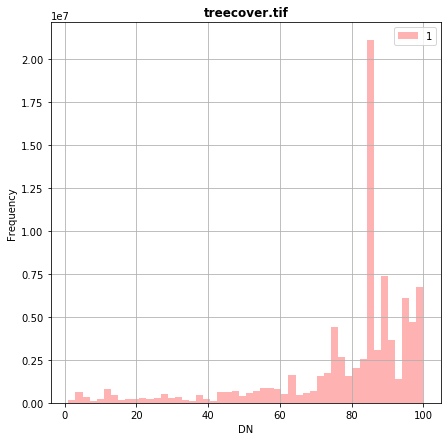

In [23]:
fig, (src1p) = pyplot.subplots(1,1, figsize=(7,7))
show_hist( src1, ax=src1p, bins=50, lw=0.0, stacked=False, alpha=0.3, histtype='stepfilled', title="treecover.tif")

**Forest height in percentage obtained from [Forest Height](https://glad.umd.edu/dataset/gedi) **

* forestheight.tif

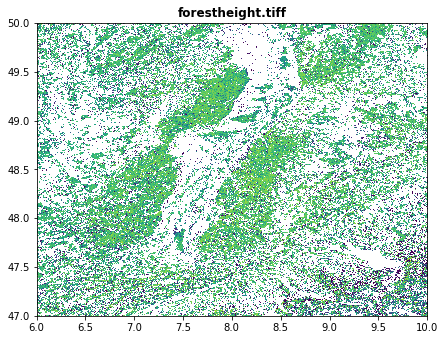

In [24]:
src1 = rasterio.open("tree_height/geodata_raster/forestheight.tif")
fig, (src1p) = pyplot.subplots(1,1, figsize=(7,7))
show((src1), ax=src1p, title='forestheight.tiff')

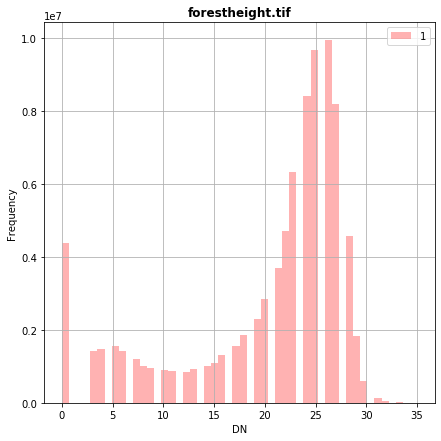

In [25]:
fig, (src1p) = pyplot.subplots(1,1, figsize=(7,7))
show_hist( src1, ax=src1p, bins=50, lw=0.0, stacked=False, alpha=0.3, histtype='stepfilled', title="forestheight.tif")

**Latitude and longittude obtained from GRASS (r.latlong)[https://grass.osgeo.org/grass78/manuals/r.latlong.html]**

* longitude.tif
* latitude.tif   

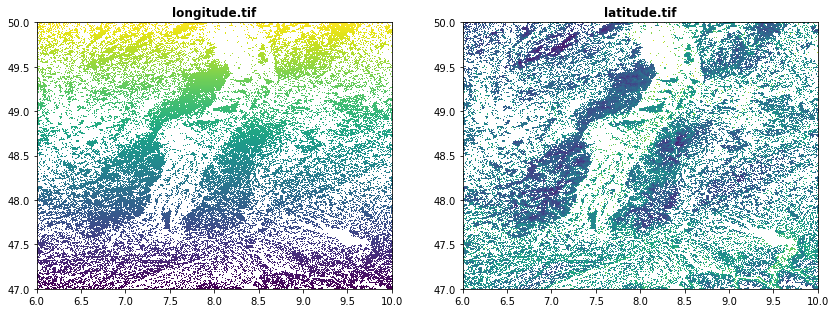

In [26]:
src1 = rasterio.open("tree_height/geodata_raster/longitude.tif")
src2 = rasterio.open("tree_height/geodata_raster/SBIO4_Temperature_Seasonality_5_15cm.tif")
fig, (src1p,src2p) = pyplot.subplots(1,2, figsize=(14,7))
show((src1), ax=src1p, title='longitude.tif')
show((src2), ax=src2p, title='latitude.tif')

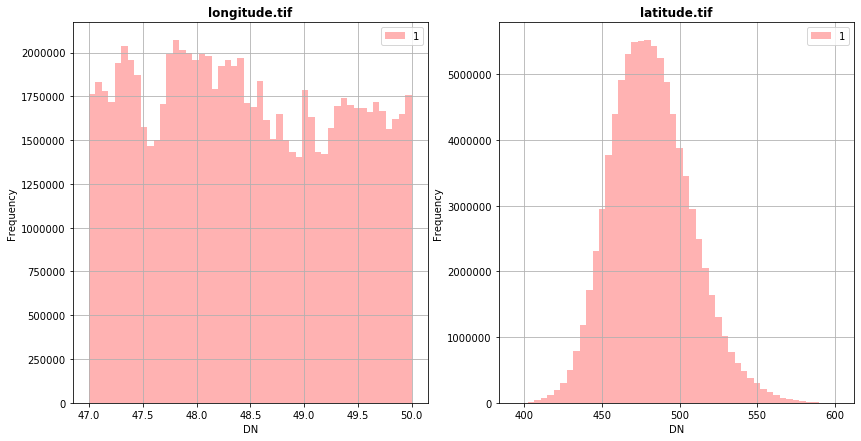

In [27]:
fig, (src1p,src2p) = pyplot.subplots(1,2, figsize=(14,7))
show_hist( src1, ax=src1p, bins=50, lw=0.0, stacked=False, alpha=0.3, histtype='stepfilled', title="longitude.tif")
show_hist( src2, ax=src2p, bins=50, lw=0.0, stacked=False, alpha=0.3, histtype='stepfilled', title="latitude.tif")